<a href="https://colab.research.google.com/github/SlavaR07/Slavas/blob/main/17_marth_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
N = 50
data, labels = make_blobs(n_samples = 50, centers = 2, random_state = 0)
print(data)

[[ 0.9845149   1.95211539]
 [ 1.65209057  2.12010873]
 [ 1.7373078   4.42546234]
 [ 2.47034915  4.09862906]
 [ 2.12178474  1.20013556]
 [ 3.19466821 -0.33716216]
 [ 3.93841822 -0.4500954 ]
 [ 2.06576754  2.68353415]
 [ 2.02708529  1.32599553]
 [-0.73000011  6.25456272]
 [ 2.20656076  5.50616718]
 [-0.27652528  5.08127768]
 [ 1.1312175   4.68194985]
 [ 1.18447037  0.318814  ]
 [ 1.84070628  3.56162231]
 [ 1.28933778  3.44969159]
 [ 0.58894326  4.00148458]
 [ 2.45760916  0.21285357]
 [ 0.08848433  2.32299086]
 [ 0.87305123  4.71438583]
 [ 1.42094543  0.53492249]
 [ 2.41163392  1.60423683]
 [ 1.14796916  0.94960906]
 [ 1.38280707  0.5381105 ]
 [ 2.78435808  1.02664657]
 [ 3.2460247   2.84942165]
 [ 0.4666179   3.86571303]
 [-1.57671974  4.95740592]
 [ 2.23269366  0.49588272]
 [ 2.84382807  3.32650945]
 [ 2.2635425   1.8743027 ]
 [ 0.08080352  4.69068983]
 [ 1.42013331  4.63746165]
 [-0.63762777  4.09104705]
 [ 2.50904929  5.7731461 ]
 [ 1.74371499  0.953829  ]
 [ 2.18217961  1.29965302]
 

In [111]:
print(labels)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0]


In [146]:
def plot(data, labels):
  x1 = data[labels==0, 0]
  x2 = data[labels==1, 0]
  y1 = data[labels==0, 1]
  y2 = data[labels==1, 1]
  plt.scatter(x1, y1, color='red')
  plt.scatter(x2, y2, color='green')

In [134]:
def plot_c(data, labels, xc1, yc1, xc2, yc2):
  x1 = data[labels==0, 0]
  x2 = data[labels==1, 0]
  y1 = data[labels==0, 1]
  y2 = data[labels==1, 1]
  plt.scatter(x1, y1, color='lightcoral')
  plt.scatter(x2, y2, color='lime')
  plt.scatter(xc1, yc1, color='red')
  plt.scatter(xc2, yc2, color='green')

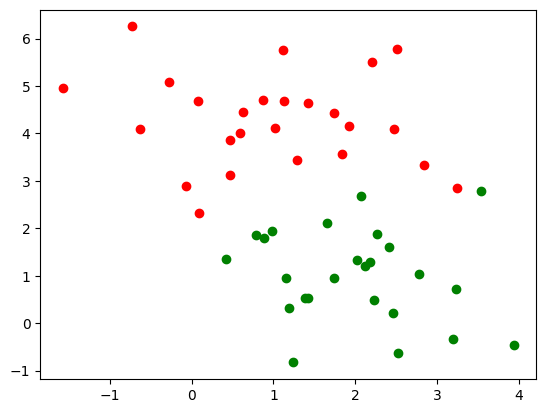

In [135]:
plt.scatter(x1, y1, color='red')
plt.scatter(x2, y2, color='green')

In [115]:
import numpy as np

clusters = np.zeros(N)
clusters

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [116]:
import random

i1 = random.randint(1, N)
i2 = random.randint(1, N)

xc1, yc1 = data[i1][0], data[i1][1]
xc2, yc2 = data[i2][0], data[i2][1]

In [117]:
plot_c(data,clasters,xc1, yc1, xc2, yc2 )

In [141]:
import math

def dist(x1, y1, x2, y2):
  return math.sqrt((x2-x1)**2 + (y2 - y1)**2)

In [119]:
dist(1, 2, 3, 4)

2.8284271247461903

In [142]:
def new_clusters(data, clusters, xc1, yc1, xc2, yc2):
  for i in range(len(data)):
    p = data[i]
    d1 = dist(p[0], p[1], xc1, yc1)
    d2 = dist(p[0], p[1], xc2, yc2)
    if d1 < d2:
      clusters[i] = 0
    else:
      clusters[i] = 1
  return clusters

In [121]:
 cl2 = new_clusters(data, clusters, xc1, yc1, xc2, yc2)
 plot_c(data, cl2, xc1, yc1, xc2, yc2)

In [143]:
def update_centers(data, clusters):
  x1 = data[clusters==0, 0]
  x2 = data[clusters==1, 0]
  y1 = data[clusters==0, 1]
  y2 = data[clusters==1, 1]
  xc1 = np.average(x1)
  xc2 = np.average(x2)
  yc1 = np.average(y1)
  yc2 = np.average(y2)
  return xc1, yc1, xc2, yc2

In [139]:
def clusterization(data, max_iter):
  N = len(data)
  clusters = np.zeros(N)

  i1 = random.randint(1, N)
  i2 = random.randint(1, N)
  xc1, yc1 = data[i1][0], data[i1][1]
  xc2, yc2 = data[i2][0], data[i2][1]
  for i in range(max_iter):
    clusters = new_clusters(data, clusters, xc1, yc1, xc2, yc2)
    xc1, yc1, xc2, yc2 = update_centers(data, clusters)
  return clusters

In [145]:
data

array([[ 0.9845149 ,  1.95211539],
       [ 1.65209057,  2.12010873],
       [ 1.7373078 ,  4.42546234],
       [ 2.47034915,  4.09862906],
       [ 2.12178474,  1.20013556],
       [ 3.19466821, -0.33716216],
       [ 3.93841822, -0.4500954 ],
       [ 2.06576754,  2.68353415],
       [ 2.02708529,  1.32599553],
       [-0.73000011,  6.25456272],
       [ 2.20656076,  5.50616718],
       [-0.27652528,  5.08127768],
       [ 1.1312175 ,  4.68194985],
       [ 1.18447037,  0.318814  ],
       [ 1.84070628,  3.56162231],
       [ 1.28933778,  3.44969159],
       [ 0.58894326,  4.00148458],
       [ 2.45760916,  0.21285357],
       [ 0.08848433,  2.32299086],
       [ 0.87305123,  4.71438583],
       [ 1.42094543,  0.53492249],
       [ 2.41163392,  1.60423683],
       [ 1.14796916,  0.94960906],
       [ 1.38280707,  0.5381105 ],
       [ 2.78435808,  1.02664657],
       [ 3.2460247 ,  2.84942165],
       [ 0.4666179 ,  3.86571303],
       [-1.57671974,  4.95740592],
       [ 2.23269366,

In [144]:
result

array([0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.])

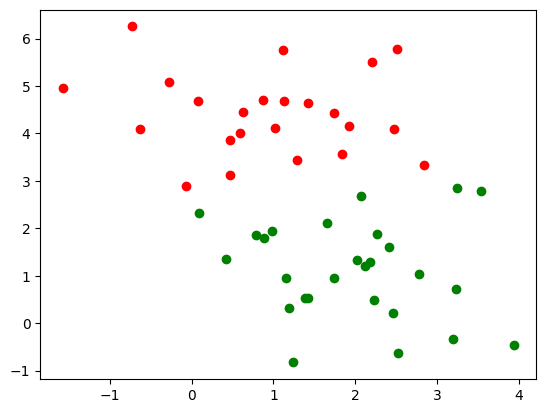

In [147]:
result = clusterization(data, 50)
plot(data,result)